In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv('FINAL_v7.csv')


In [6]:
print(len(df))
display(df.head(25))

23186


State             County  ...  WinTaxScore  TotalScore
0     AZ      Apache County  ...          9.5   -0.354331
1     AZ     Cochise County  ...          9.5   -0.462341
2     AZ    Coconino County  ...          9.5   -0.391989
3     AZ        Gila County  ...          9.5   -0.590092
4     AZ      Graham County  ...          9.5   -0.693505
5     AZ    Greenlee County  ...          9.5   -1.043439
6     AZ      La Paz County  ...          9.5   -0.651255
7     AZ    Maricopa County  ...          9.5    3.787531
8     AZ      Mohave County  ...          9.5   -0.149117
9     AZ      Navajo County  ...          9.5   -0.395774
10    AZ        Pima County  ...          9.5   -2.830483
11    AZ  Santa Cruz County  ...          9.5   -0.532383
12    AZ     Yavapai County  ...          9.5   -0.140214
13    AZ        Yuma County  ...          9.5   -0.118862
14    AZ      Apache County  ...          9.5   -0.117340
15    AZ     Cochise County  ...          9.5    0.066108
16    AZ    Coconino County  ...          9.5    0.019270
17    AZ        Gila County  ...          9.5   -0.383386
18    AZ      Graham County  ...          9.5   -0.616143
19    AZ    Greenlee County  ...          9.5   -1.077239
20    AZ      La Paz County  ...          9.5   -0.525150
21    AZ    Maricopa County  ...          9.5   18.321282
22    AZ      Mohave County  ...          9.5    0.580215
23    AZ      Navajo County  ...          9.5    0.098515
24    AZ       Pinal County  ...          9.5    1.240300

[25 rows x 22 columns]

In [7]:
df_original = df

In [9]:
# map State and county to float numbers
train_df = df[df.Year < 2018]
test_df = df[df.Year >= 2018]

In [10]:
dropping = ['State', 'County', 'Happiness Score', 'Year', 'Tax', 'Lottery Sales $', 'Win Tax %', 'PopulationScore', 'PopulationTotal', 'Lottery Tickets Sold', 'TotalCrime', 'StateCrime', 'CrimeScore', 'SalesScore', 'StatesTaxScore', 'WinTaxScore']

In [11]:
# split training data 2010-2017 and test data 2018-2019
train = train_df.drop(columns=dropping).to_numpy()
test = test_df.drop(columns=dropping).to_numpy()

In [12]:
# scale the data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train)
scaled_train = scaler.transform(train)

In [13]:
# model
# clusters -> x/10

kmeans = KMeans(n_clusters=10, init='random', random_state=200).fit(scaled_train)

In [14]:
colors = np.array(['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan'])


In [16]:

display(train_df.drop(columns=dropping).head(5))



Poverty_Percent  Median_Income  ...  Lottery Winnings  TotalScore
0             34.5        30651.0  ...           13083.4   -0.354331
1             17.7        43677.0  ...           33869.4   -0.462341
2             23.8        43051.0  ...           34485.0   -0.391989
3             19.8        37430.0  ...            9619.7   -0.590092
4             21.6        39299.0  ...            6727.9   -0.693505

[5 rows x 6 columns]

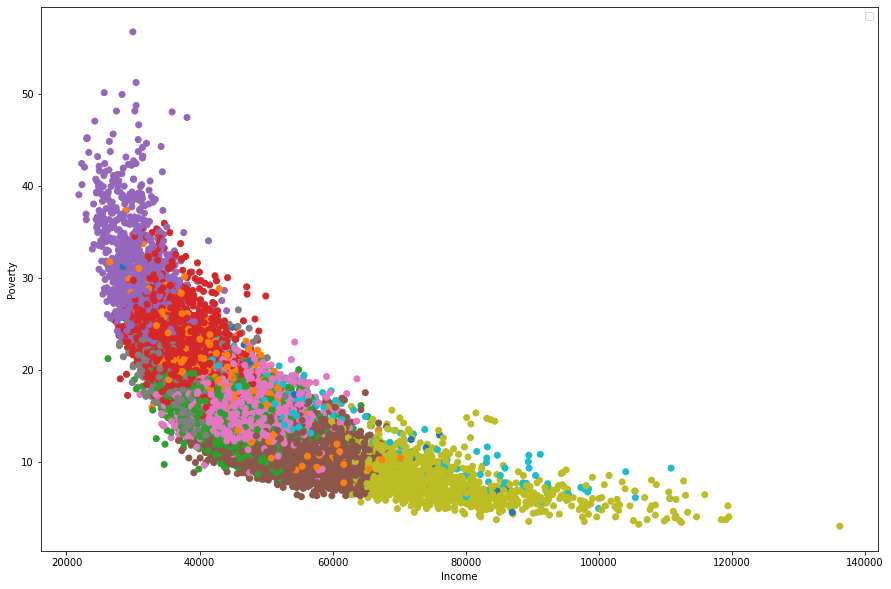

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(train[:,1], train[:,0], c = colors[kmeans.labels_])
plt.xlabel('Income')
plt.ylabel('Poverty')
plt.legend('')

Text(0, 0.5, 'Unemployment')

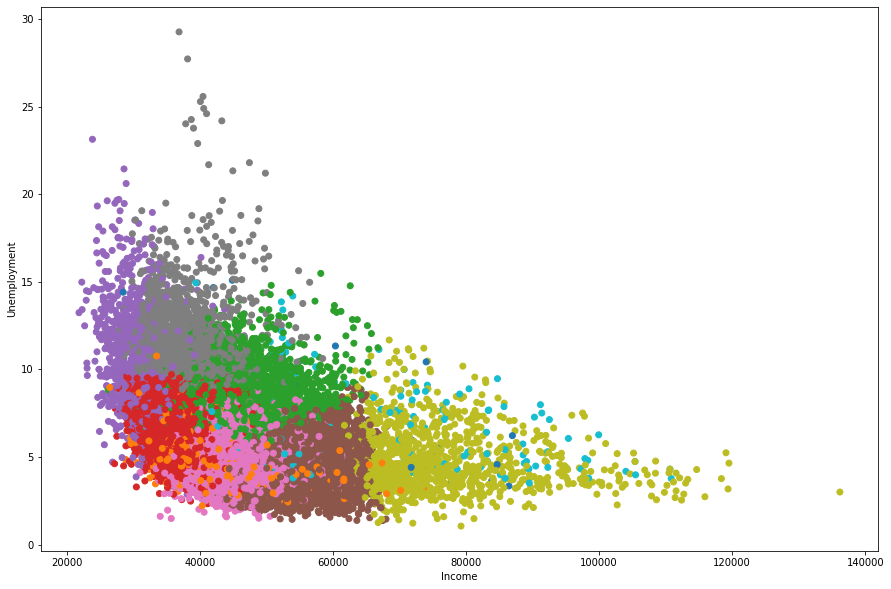

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(train[:,1], train[:,2], c= colors[kmeans.labels_])
plt.xlabel('Income')
plt.ylabel('Unemployment')

Text(0.5, 0, 'Happiness')

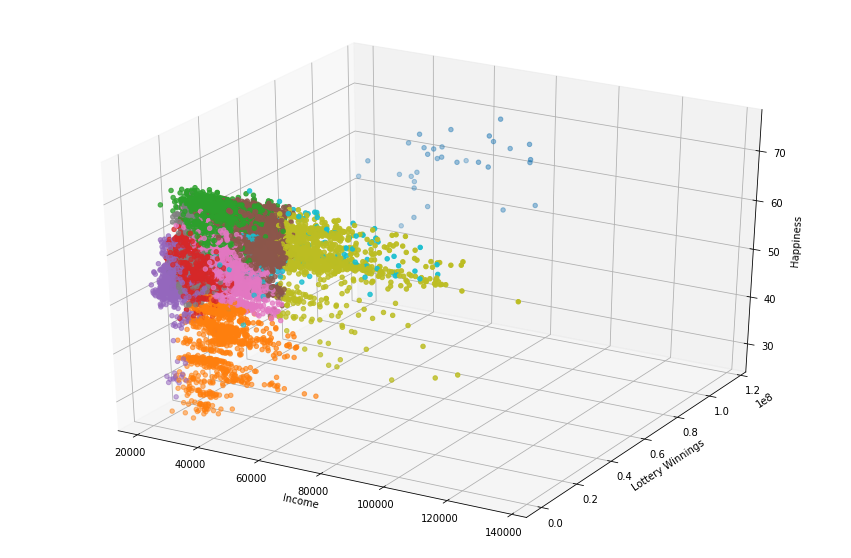

In [19]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
# labels: 0=Poverty_Percent;	1=Median_Income; 2=Year;	3=Unemployment;	4=Happiness Score;	5=Tax;	6=Lottery Sales $;	7=Win Tax %;	8=County Happiness
ax.scatter3D(train[:,1], train[:,4], train[:,3], c= colors[kmeans.labels_])
plt.xlabel('Income')
plt.ylabel('Lottery Winnings')
ax.set_zlabel('Happiness')

In [20]:
import sys
scaled_test = scaler.transform(test)
np.set_printoptions(threshold=sys.maxsize)
predict_test = kmeans.predict(scaled_test)
#predict = KMeans(n_clusters = 10).fit_predict(x1)

Text(0.5, 0, 'Happiness')

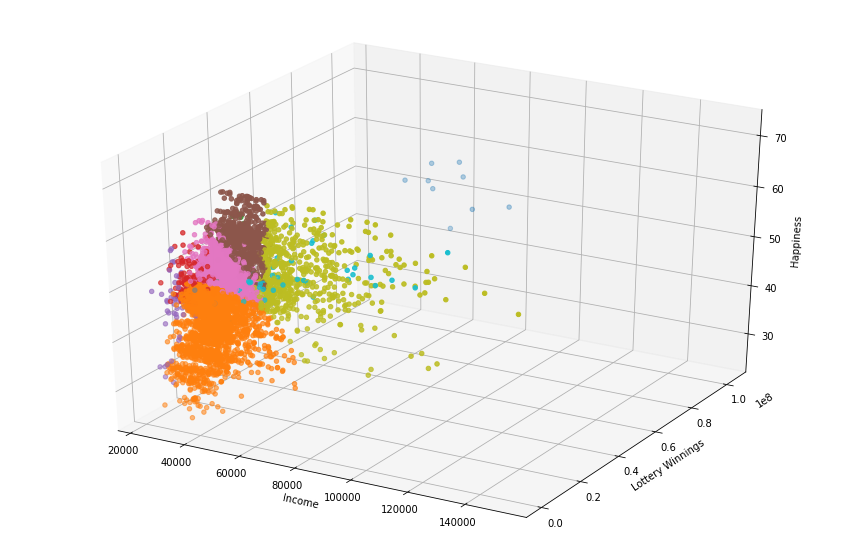

In [21]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D(test[:,1], test[:,4], test[:,3], c = colors[predict_test])
plt.xlabel('Income')
plt.ylabel('Lottery Winnings')
ax.set_zlabel('Happiness')

In [22]:
# we want the foggy blue label, clear purple and dark purple possibly
t = test_df

In [23]:
t['Label'] = predict_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(t.sort_values(by=['Label'], ascending=True).head(10))

State             County  Poverty_Percent  Median_Income  Year  \
10568    MO        Cole County             10.6        61847.0  2019   
8793     MI     Lenawee County             11.8        55466.0  2019   
3066     GA     Lowndes County             20.4        46450.0  2019   
19872    TX      Dallas County             14.0        61807.0  2019   
22971    FL    Hernando County             12.4        50705.0  2019   
19688    TX     Hopkins County             14.6        52079.0  2018   
15843    OR   Multnomah County             12.0        72469.0  2019   
19638    TX      Dallas County             14.2        59838.0  2018   
23160    WY  Sweetwater County              8.3        80639.0  2019   
7680     KY     Jackson County             26.5        35317.0  2018   

       Unemployment  Happiness Score   Tax  Lottery Sales $  Win Tax %  \
10568      2.575000           42.760  8.18       56420562.0       4.00   
8793       3.791667           49.520  6.00      141301796.0       4.25   
3066       3.616667           55.150  7.31      131064201.0       6.00   
19872      3.516667           52.560  8.19      254315556.0       0.00   
22971      4.408333           51.010  7.05      274524152.0       0.00   
19688      3.400000           53.600  8.17      364743107.0       0.00   
15843      3.233333           48.050  0.00       27447690.0       8.00   
19638      3.825000           53.600  8.17      364743107.0       0.00   
23160      4.000000           48.900  5.36        4915645.0       0.00   
7680       6.800000           40.555  6.00       57691836.0       6.00   

       County Happiness  PopulationTotal  PopulationScore  \
10568         44.831727            76745             1.25   
8793          52.389588            98451             0.99   
3066          53.613983           117406             1.11   
19872         53.965328          2635516             9.09   
22971         52.636078           193920             0.90   
19688         56.357778            36738             0.13   
15843         50.597046           812855            19.27   
19638         56.613315          2629350             9.18   
23160         50.249593            42343             7.32   
7680          35.143589            13403             0.30   

       Lottery Tickets Sold  Lottery Winnings  TotalCrime  StateCrime  \
10568          3.527533e+05      9.604774e+07       415.0     31972.0   
8793           6.964805e+05      9.585315e+07       214.0     26435.0   
3066           7.246449e+05      9.410514e+07         0.0     28521.0   
19872          1.155772e+07      1.027521e+08       350.0    119826.0   
22971          1.239323e+06      1.001845e+08      2723.0    205802.0   
19688          2.340300e+05      1.000430e+08        86.0    114432.0   
15843          2.644901e+06      9.236189e+07      1861.0     20571.0   
19638          1.674960e+07      1.035356e+08       286.0    114432.0   
23160          1.798185e+05      1.000250e+08        99.0      1360.0   
7680           8.666411e+04      1.121044e+04        63.0     11937.0   

       CrimeScore  SalesScore  StatesTaxScore  WinTaxScore  TotalScore  Label  
10568   -0.016225    0.788477       -1.337528        9.600   -0.565275      0  
8793    -0.008014    1.604519       -1.050782        9.575    0.545723      0  
3066     0.000000    1.474185       -0.944040        9.400    0.530145      0  
19872   -0.026551   25.546861       -1.367497       10.000   24.152813      0  
22971   -0.011908    3.821034       -1.051588       10.000    2.757537      0  
19688   -0.000098    0.378651       -1.151012       10.000   -0.772459      0  
15843   -1.743302    9.084353       -0.810953        9.200    6.530097      0  
19638   -0.022944   26.738572       -1.322504       10.000   25.393124      0  
23160   -0.532853    0.951971       -1.506549       10.000   -1.087431      0  
7680    -0.001583    0.134094       -0.661544        9.400   -0.529034      1

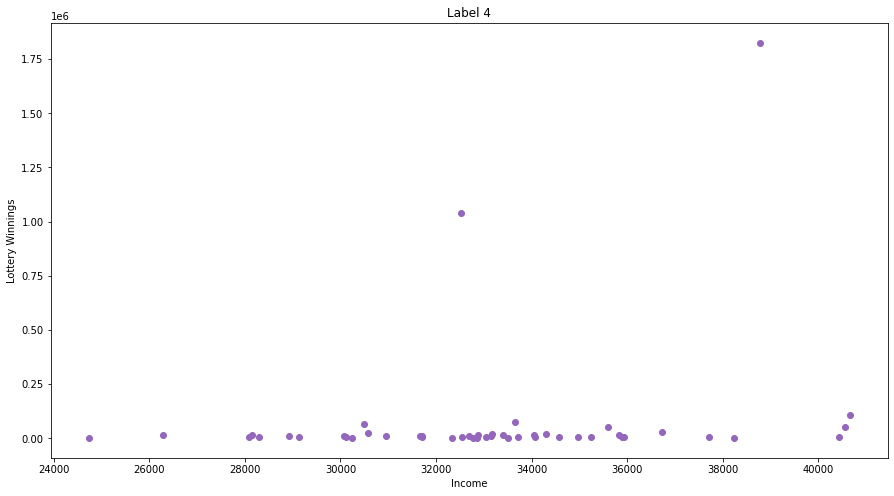

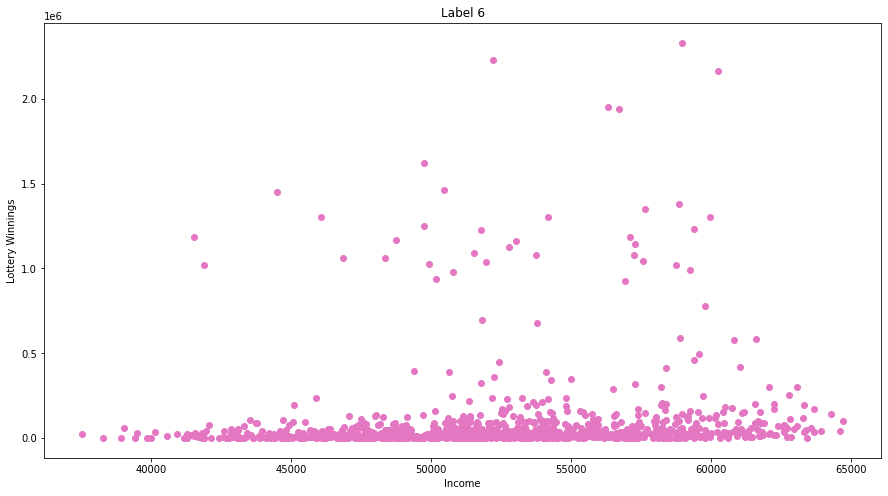

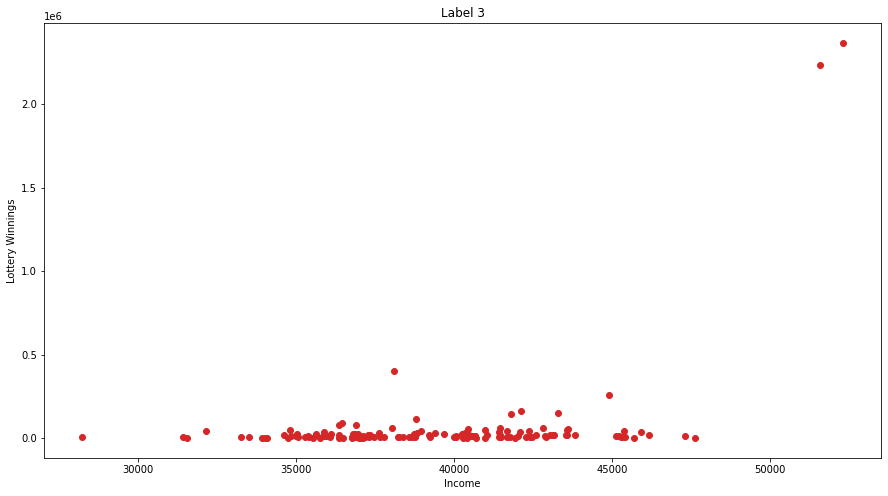

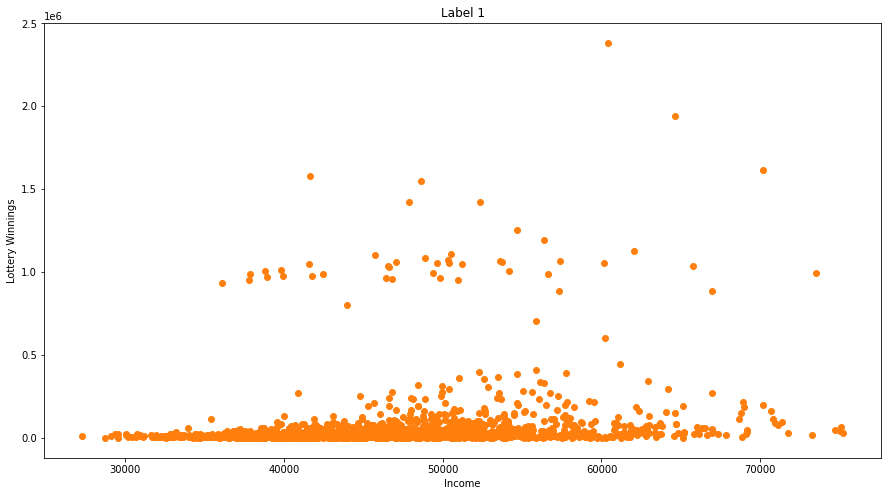

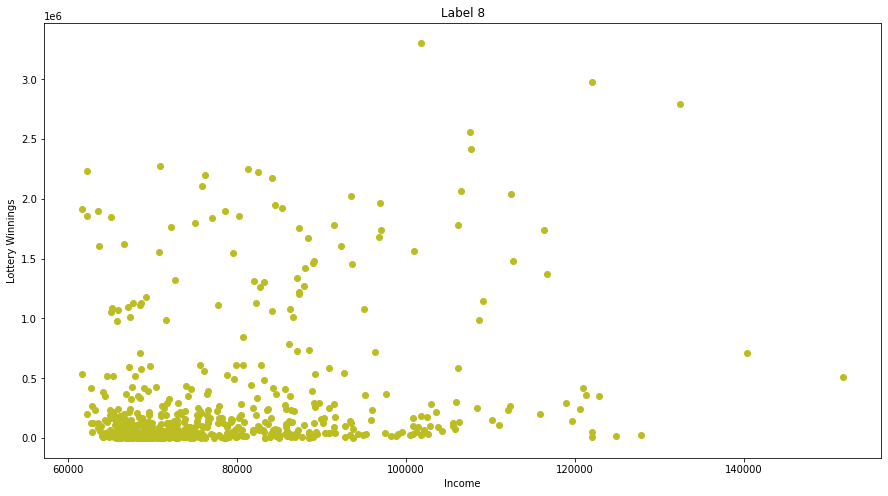

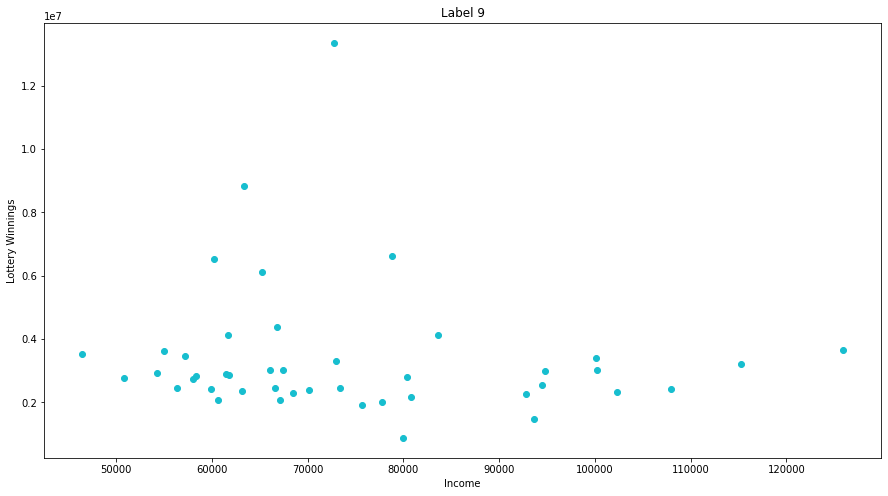

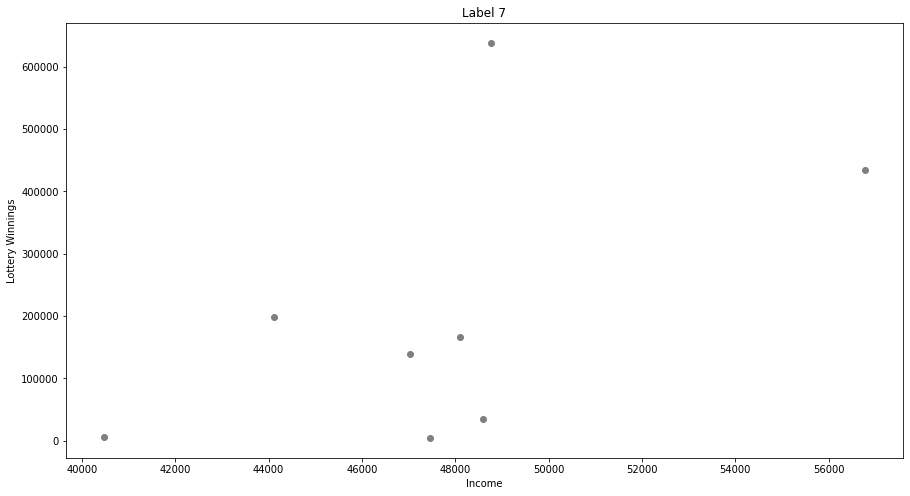

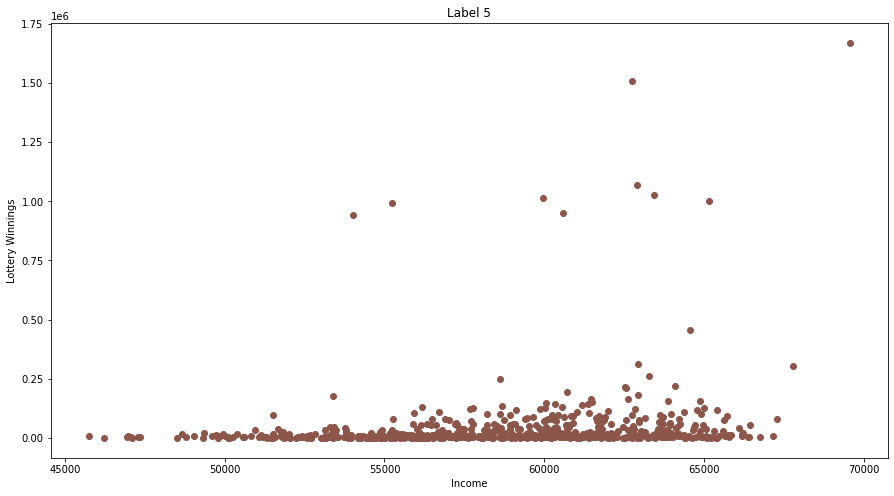

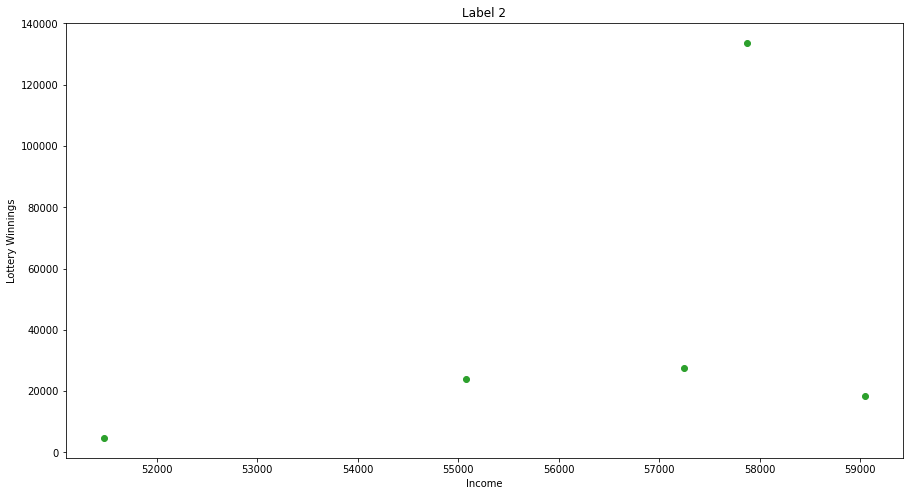

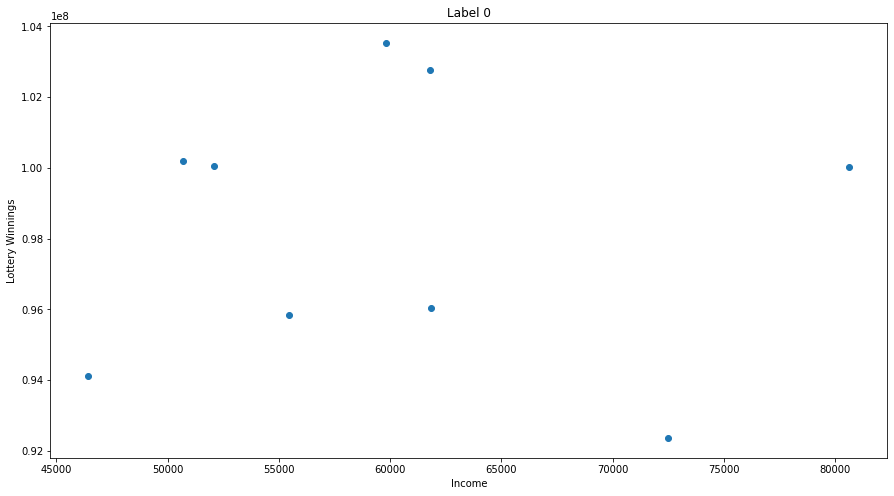

In [25]:
for l in pd.unique(t['Label']):
  r = t[t['Label']==l].to_numpy()
  plt.figure(figsize=(15,8))
  plt.scatter(r[:,3], r[:,14], c=colors[l])
  plt.xlabel('Income')
  plt.ylabel('Lottery Winnings')
  plt.title('Label '+str(l))


In [26]:
display(t.sort_values(by=['Lottery Winnings']))

State                    County  Poverty_Percent  Median_Income  Year  \
19965    TX             Loving County              7.1        88487.0  2019   
19723    TX             Loving County              3.3        78637.0  2018   
19949    TX               King County             11.0        71256.0  2019   
11178    MT           Treasure County             12.2        51754.0  2019   
19710    TX               King County             13.7        57925.0  2018   
19945    TX             Kenedy County             14.2        46132.0  2019   
11147    MT      Golden Valley County             19.7        40469.0  2019   
11181    MT             Wibaux County             11.3        51145.0  2019   
1804     CO           San Juan County             13.7        50524.0  2019   
11166    MT            Prairie County             13.1        46663.0  2019   
11773    NE             Arthur County             12.9        46862.0  2018   
1789     CO            Mineral County              9.4        63015.0  2019   
11096    MT      Golden Valley County             18.9        38782.0  2018   
1777     CO           Hinsdale County              8.9        61391.0  2019   
19832    TX             Borden County             10.6        71926.0  2019   
19970    TX           McMullen County             10.5        68349.0  2019   
19946    TX               Kent County             11.5        52591.0  2019   
14040    ND           Billings County              9.7        69528.0  2019   
11807    NE             Hooker County              8.3        46220.0  2018   
17032    SD            Harding County             11.9        55482.0  2019   
11114    MT            Prairie County             13.5        42754.0  2018   
11155    MT             McCone County             14.5        48551.0  2019   
20011    TX            Roberts County              7.4        70705.0  2019   
1732     CO            Mineral County              9.3        60210.0  2018   
6813     KS            Greeley County             10.9        58492.0  2019   
1720     CO           Hinsdale County              8.6        62149.0  2018   
11084    MT             Carter County             13.7        47985.0  2018   
11094    MT           Garfield County             16.3        44580.0  2018   
11846    NE            Wheeler County             14.0        53369.0  2018   
11135    MT             Carter County             14.2        49057.0  2019   
11145    MT           Garfield County             16.4        43106.0  2019   
14080    ND              Slope County             13.5        52695.0  2019   
11151    MT       Judith Basin County             14.5        49401.0  2019   
3584     ID              Clark County             15.5        48471.0  2018   
19707    TX               Kent County             13.3        47625.0  2018   
11180    MT          Wheatland County             18.3        42059.0  2019   
19728    TX           McMullen County             11.1        64633.0  2018   
6826     KS               Lane County             10.3        60315.0  2019   
11804    NE              Hayes County             16.2        47047.0  2018   
11128    MT             Wibaux County             12.0        49532.0  2018   
19786    TX            Terrell County             18.9        41413.0  2018   
6723     KS            Greeley County             11.3        51606.0  2018   
11164    MT       Powder River County             13.8        47843.0  2019   
16980    SD            Harding County             10.7        55017.0  2018   
11138    MT            Daniels County             11.0        50001.0  2019   
1747     CO           San Juan County             14.4        46878.0  2018   
15502    OK           Cimarron County             17.8        47602.0  2019   
17017    SD           Campbell County             10.5        56043.0  2019   
19763    TX            Roberts County              7.8        67470.0  2018   
15828    OR            Gilliam County             10.9  

Text(0, 0.5, 'Poverty')

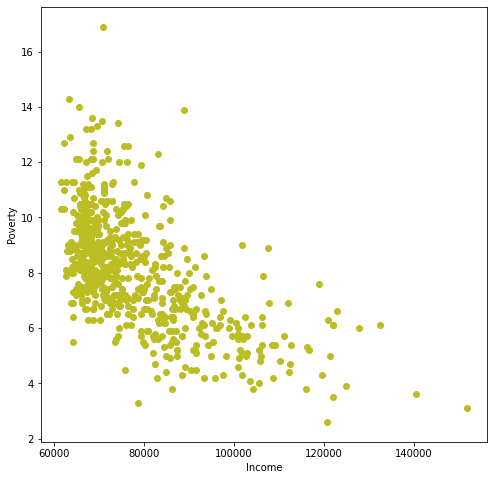

In [28]:
# looks like label 5 is the most optimal
r = t[t['Label']==8].to_numpy()
plt.figure(figsize=(8,8))
plt.scatter(r[:,3], r[:,2], c=colors[8])
plt.xlabel('Income')
plt.ylabel('Poverty')

Text(0, 0.5, 'Happiness')

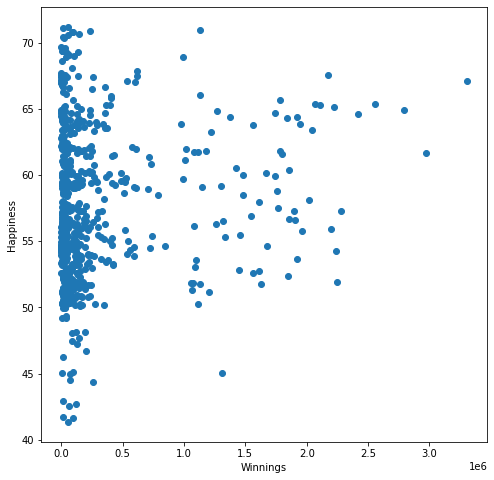

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(r[:,14], r[:,10])
plt.xlabel('Winnings')
plt.ylabel('Happiness')

In [32]:
# calulating stats for label 8 
final_df = t[t['Label'] == 8].drop(columns=['Year'])
print(final_df.groupby('Label').mean())

       Poverty_Percent  Median_Income  Unemployment  Happiness Score  \
Label                                                                  
8             8.089922   77712.458915       3.17823        55.991372   

            Tax  Lottery Sales $  Win Tax %  County Happiness  \
Label                                                           
8      6.936558     1.401235e+08   3.948233         57.964648   

       PopulationTotal  PopulationScore  Lottery Tickets Sold  \
Label                                                           
8        181616.007752         2.539411          1.231522e+06   

       Lottery Winnings  TotalCrime    StateCrime  CrimeScore  SalesScore  \
Label                                                                       
8         286472.140131  936.703876  48031.862016   -0.233782    2.730372   

       StatesTaxScore  WinTaxScore  TotalScore  
Label                                           
8             -1.5651     9.605177     0.93149  


In [33]:
print("We've found",len(final_df), "counties fit for our goals.")
display(final_df.groupby(['State', 'County']).mean())


We've found 645 counties fit for our goals.


Poverty_Percent  Median_Income  Unemployment  \
State County                                                                 
AZ    Greenlee County                9.900000   66942.000000      4.091667   
CA    Alameda County                 8.950000  104666.500000      3.033333   
      Calaveras County              12.100000   68248.000000      3.883333   
      Contra Costa County            7.900000  106555.000000      3.133333   
      El Dorado County               8.100000   81869.000000      3.650000   
      Marin County                   6.750000  117501.000000      2.408333   
      Monterey County               12.950000   73087.000000      6.454167   
      Napa County                    7.400000   90230.000000      2.900000   
      Nevada County                  9.850000   68115.500000      3.454167   
      Placer County                  6.850000   93431.500000      3.191667   
      San Benito County              9.500000   82136.000000      5.079167   
      San Joaquin County            13.600000   68458.000000      6.000000   
      Santa Barbara County          12.300000   75088.000000      3.820833   
      Santa Clara County             6.100000  132444.000000      2.533333   
      Santa Cruz County             10.600000   85770.000000      4.975000   
      Solano County                  8.450000   84256.000000      3.900000   
      Ventura County                 8.650000   87808.000000      3.758333   
      Yolo County                   16.900000   70951.000000      4.191667   
CO    Adams County                   9.300000   75341.000000      2.833333   
      Arapahoe County                7.200000   82364.000000      2.616667   
      Boulder County                 9.700000   83591.000000      2.633333   
      Clear Creek County             7.300000   76959.500000      2.591667   
      Douglas County                 2.600000  120670.000000      2.625000   
      Eagle County                   6.700000   86896.000000      2.500000   
      El Paso County                 9.350000   70299.000000      3.395833   
      Elbert County                  5.350000   99990.000000      2.354167   
      Garfield County                9.000000   74104.500000      2.766667   
      Gilpin County                  6.750000   73877.500000      2.279167   
      Grand County                   8.000000   70121.500000      2.270833   
      Jefferson County               7.200000   89696.000000      2.450000   
      La Plata County               10.250000   72024.000000      2.583333   
      Larimer County                10.400000   73319.000000      2.458333   
      Ouray County                   7.200000   70868.000000      3.054167   
      Park County                    8.350000   74671.000000      2.520833   
      Pitkin County                  6.500000   90927.000000      3.300000   
      Rio Blanco County             10.300000   65960.000000      3.533333   
      Routt County                   7.100000   84362.000000      2.304167   
      San Miguel County              9.250000   73333.500000      3.062500   
      Summit County                  6.550000   83324.000000      1.891667   
      Teller County                  7.650000   67724.500000      3.191667   
      Weld County                    9.450000   76894.500000      2.654167   
DE    New Castle County             10.400000   76076.000000      3.541667   
FL    Clay County                    8.550000   69305.500000      3.266667   
      Collier County                 9.400000   76415.000000      3.275000   
      Manatee County                11.300000   64151.000000      3.308333   
      Monroe County                 10.950000   67311.000000      2.375000   
      Nassau County                  9.700000   69858.000000      3.179167   
      Santa Rosa County              9.500000   69541.000000      3.400000   
      Sarasota County               10.300000   61652.000000      3.475000   
      Seminole County                9.900000   6718